T shape =  (1000, 200)
X shape =  (1000, 200)
U shape =  (1000, 200)
U type  =  <class 'numpy.ndarray'>


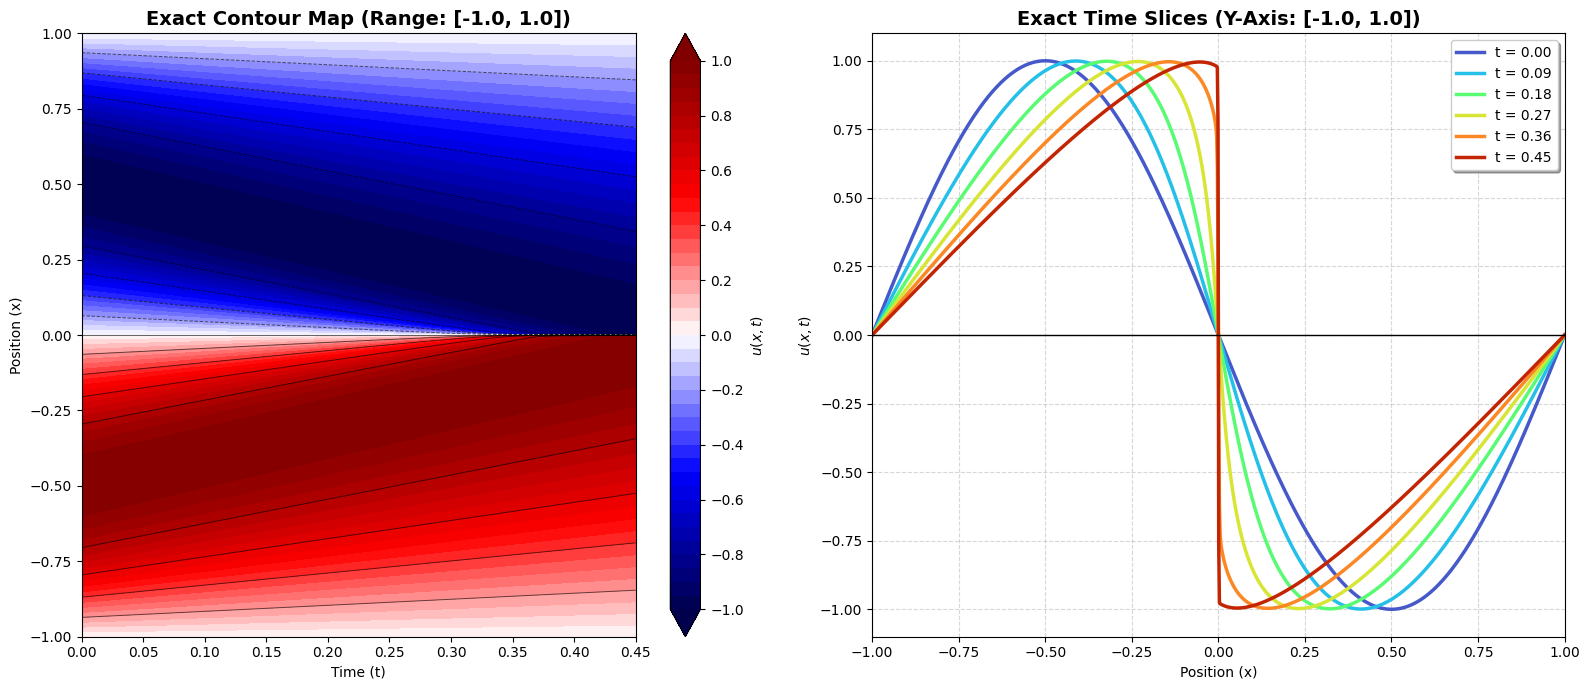

In [1]:
# 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- הגדרות הבעיה ---
nu = 0.001
x_min, x_max = -1.0, 1.0
t_min, t_max = 0.0, 0.45
nx, nt = 1000, 200  # העליתי מעט את nx לשיפור היציבות

x = np.linspace(x_min, x_max, nx)
dx = x[1] - x[0]
u0 = -np.sin(np.pi * x)

def burgers_rhs(t, u, nx, dx, nu):
    du_dt = np.zeros_like(u)
    u_inner, u_left, u_right = u[1:-1], u[:-2], u[2:]
    # איבר אדווקציה + איבר דיפוזיה
    du_dt[1:-1] = -u_inner * (u_right - u_left) / (2 * dx) + \
                   nu * (u_right - 2*u_inner + u_left) / (dx**2)
    return du_dt

# פתרון נומרי (שימוש ב-Radau למשוואות קשיחות)
sol = solve_ivp(burgers_rhs, (t_min, t_max), u0, 
                t_eval=np.linspace(t_min, t_max, nt), 
                args=(nx, dx, nu), method='Radau', rtol=1e-5)

# חילוץ נתונים שחושבו בפועל
actual_nt = sol.y.shape[1]
T, X = np.meshgrid(sol.t, x)
#X, T = np.meshgrid(x,sol.t)
U = sol.y 
print ('T shape = ',np.shape(T))
print ('X shape = ',np.shape(X))
print ('U shape = ',np.shape(U))
print ('U type  = ',type(U))
# --- יצירת הגרפים ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# טווח ערכים קבוע לבקשתך
v_min, v_max = -1.0, 1.0

# 1. גרף קונטור (שמאל) - צבעים בטווח [-1, 1]
levels = np.linspace(v_min, v_max, 41)
cf = ax1.contourf(T, X, U, levels=levels, cmap='seismic', extend='both')
# קווי מתאר שחורים בולטים
cl = ax1.contour(T, X, U, levels=np.linspace(v_min, v_max, 11), 
                 colors='black', linewidths=0.7, alpha=0.6)

ax1.set_title(f"Exact Contour Map (Range: [{v_min}, {v_max}])", fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Position (x)')
fig.colorbar(cf, ax=ax1, label='$u(x,t)$', ticks=np.linspace(v_min, v_max, 11))

# 2. גרף חתכי זמן (ימין) - ציר Y בטווח [-1, 1]
# בחירת זמנים להצגה מתוך מה שחושב בפועל
steps_to_plot = np.linspace(0, actual_nt-1, 6, dtype=int)
colors = plt.cm.turbo(np.linspace(0.1, 0.9, len(steps_to_plot)))

for i, step in enumerate(steps_to_plot):
    ax2.plot(x, U[:, step], label=f't = {sol.t[step]:.2f}', color=colors[i], lw=2.5)

ax2.set_title(f"Exact Time Slices (Y-Axis: [{v_min}, {v_max}])", fontsize=14, fontweight='bold')
ax2.set_xlabel('Position (x)')
ax2.set_ylabel('$u(x,t)$')

# קיבוע טווח הצירים
ax2.set_ylim(v_min - 0.1, v_max + 0.1) # תוספת קטנה למרווח נשימה ויזואלי
ax2.set_xlim(x_min, x_max)

ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', frameon=True, shadow=True)
ax2.axhline(0, color='black', lw=1) # קו אפס מרכזי

plt.tight_layout()
plt.show()


# שמירת המערכים לקובץ אחד דחוס
# שים לב: sol.t הוא מערך הזמנים שחושבו, ו-sol.y הוא המטריצה של u
np.savez('exact_sol.npz', x=x, t=sol.t, u=sol.y)

#print("The solution has been saved to 'exact_sol.npz'")

# יצירת רשימה של זוגות (t, x) וערך ה-u המתאים להם
#X, T = np.meshgrid(x, sol.t, indexing='ij')
#data_to_save = np.stack([T.flatten(), X.flatten(), sol.y.flatten()], axis=1)
#np.savetxt('exact_sol.csv', data_to_save, delimiter=',', header='t,x,u')
#print (x)

#np.savetxt('exact_sol_x_grid.csv', x, delimiter=',')
#np.savetxt('exact_sol_t_grid.csv', sol.t, delimiter=',')